In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 %matplotlib inline
 import seaborn as sns
 from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
 from sklearn.linear_model import LinearRegression,LogisticRegression
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
 from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/Gold Price Prediction Data Set CSV File.csv")

In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#we have to predict gld column using other columns
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#Calculation number of rows and columns in the dataset
data.shape

(2290, 6)

In [ ]:
#Information about daat types of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#Since each column as 2290 (that is exactly as same number of rows) this means we have no missing values

In [ ]:
#Checking number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.isnull().mean()

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [ ]:
#getting statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#25% percentile means 25 percent values are less than 1239

In [ ]:
#Doing Data Analysis
#Finding Correlation
corr=data.corr()
print(corr)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-14-9da7476a2cf8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

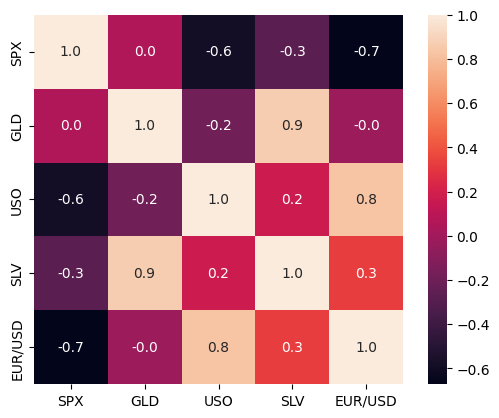

In [ ]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

In [ ]:
#Correlation value of GLD
print(corr["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-22-18e1d47b4ee5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["GLD"],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

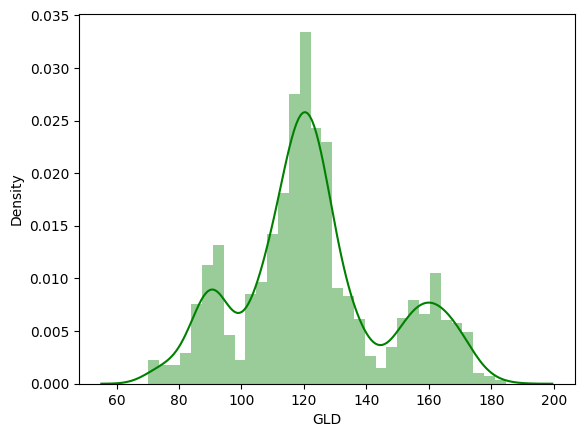

In [ ]:
#Check the distribution of the gold price
sns.distplot(data["GLD"],color='green')

In [ ]:
#From this we can see that more values are in 120 range

In [ ]:
#Splitting the features and target
x=data.drop(["Date","GLD"],axis=1)

In [ ]:
y=data['GLD']

In [ ]:
print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#Splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#model training
#RANDOM FOREST REGRESSOR

In [ ]:
reg=RandomForestRegressor()

In [ ]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#model evaluation
#Prediction on test data
test_data_pred=reg.predict(x_test)
print(test_data_pred)

[168.48729923  82.0695999  115.8258004  127.60230047 120.51170116
 154.81949768 150.82559792 126.01500069 117.39089874 125.98440095
 116.71740087 171.282101   141.5729984  167.49089872 115.32769992
 117.52520027 138.01080385 169.7798002  158.95870279 159.96350026
 155.18739982 125.18410013 177.22780008 157.35400347 125.25270029
  93.79379961  77.67900034 120.62700018 119.10759951 167.50780046
  88.32700081 125.29070014  91.13240096 117.64400041 121.05389874
 135.96709998 115.72650103 115.17220068 146.85910041 106.92380127
 104.38980242  87.06969796 126.54560056 118.06470018 153.16919921
 119.53189996 108.43379969 108.01559861  93.21320068 127.05879802
  74.52850054 113.6601992  121.49420007 111.17409906 118.82419893
 120.78839936 160.14970056 165.04810161 146.90409653  85.8367985
  94.49630065  86.89389873  90.81120086 119.04790072 126.43900077
 127.63320037 169.39559992 122.19079924 117.11669911  98.52750031
 168.26310032 142.80329857 132.48110213 121.1491024  121.27429954
 119.644100

In [ ]:
#using r squared error
error_score=metrics.r2_score(y_test,test_data_pred)

In [ ]:
print(error_score)

0.9898854573166072


Text(0, 0.5, 'GLD Price')

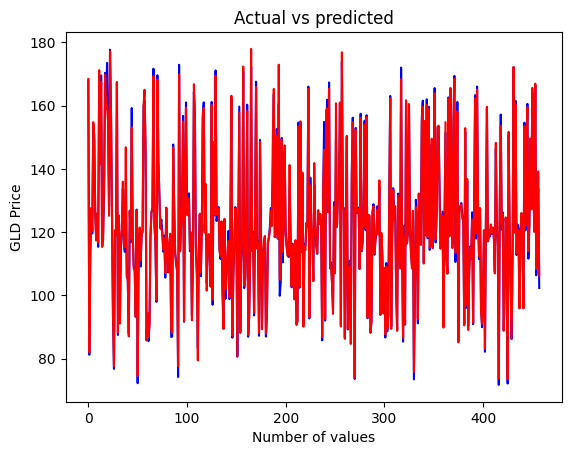

In [ ]:
#Compare the actual values and predicted values using graphs
#therefore first convert y_test into list otherwise there will be error
y_test=list(y_test) #now this becomes a series dataframe
plt.plot(y_test,color='Blue',label="Actual Value")
plt.plot(test_data_pred,color="Red",label="Predictions")
plt.title("Actual vs predicted")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")

In [ ]:
#actual price is slightly more than predicted values

In [ ]:
lin=LinearRegression()
lin.fit(x_train,y_train)
pred=lin.predict(x_test)
print(metrics.r2_score(pred,y_test))

0.8558146331362875
